<a href="https://colab.research.google.com/github/superoverflow/notebooks/blob/main/matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!! pip install mpl_finance yfinance

In [21]:
import matplotlib.pyplot as plt
import yfinance as yf
from mpl_finance import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpl_dates
from datetime import date
import numpy as np

TICKER = "MSFT"

In [18]:
raw_data = yf.Ticker(TICKER).history(period="1d", start=date(2020, 1, 1)).reset_index()
ohlc = raw_data.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)
ohlc.head()

,Date,Open,High,Low,Close
0,18263.208333,153.977452,155.868469,153.541066,155.761795
1,18264.208333,153.531382,155.112070,153.279237,153.822296
2,18267.208333,152.328863,154.287769,151.776096,154.219879
3,18268.208333,154.501128,154.840532,152.561621,152.813751
4,18269.208333,154.122916,155.936365,153.172561,155.247833


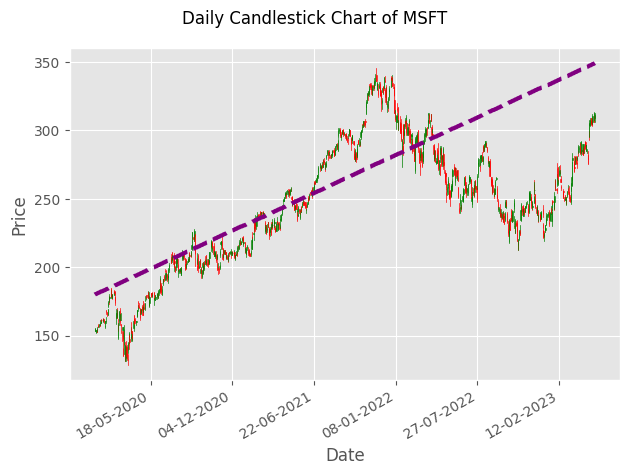

In [30]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle(f'Daily Candlestick Chart of {TICKER}')
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()

y = [180 + i* 0.2 for i in range(len(ohlc))]
plt.plot(ohlc['Date'], y, color='purple', linewidth=3, linestyle="--")

plt.show()